# How does the Proportion of Women in Parliament Affect the Country's Military Expenditure? | Appendix


### Authors:
- [Anna Dovha](https://www.linkedin.com/in/anna-dovha-28b178218/)
- [Guillaume Chapalain](linkedin.com/in/guillaume-chapalain)
- [Maxime Sperandio](https://www.linkedin.com/in/maxime-sperandio-b30339269/)


# Upload the packages and data

In [46]:
# Install required packages
!pip install seaborn==0.10.0
!pip install numpy >= 1.13
!pip install -U linearmodels
!pip install -U stargazer
!pip install -U statsmodels
!pip install uvicorn
!pip install PtitPrince
!pip install graphviz

# Import packages
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
import pandas as pd
import numpy as np
import datetime
from collections.abc import Sequence
import plotly.express as px
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
import seaborn as sns
import ptitprince as pt
from ptitprince import RainCloud
from scipy.stats import skew
import graphviz as gr



  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
ptitprince 0.2.7 requires seaborn==0.11, but you have seaborn 0.10.0 which is incompatible.


ERROR: Could not find a version that satisfies the requirement 1.13 (from versions: none)
ERROR: No matching distribution found for 1.13
  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.


In [47]:
# SEABORN THEME
scale = 0.4
W = 16*scale
H = 9*scale
sns.set(rc = {'figure.figsize':(W,H)})
sns.set_style("white")

Our analysis predominantly relies on data sourced from the World Bank, accessed through the [**wbdata**](https://wbdata.readthedocs.io/en/stable/) Python package. After installing the package `(!pip install -U wbdata)`, we imported it into our Python environment. Additionally, we used dataset from the [Polity5 project](https://www.systemicpeace.org/polityproject.html) using a [direct URL](https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/2023/02_Data-Cleaning/data/polity2_iso3.csv). This dataset was loaded into a pandas DataFrame using the `pd.read_csv` function in Python.

You can directly upload the cleaned datasets from our GitHub repository

In [48]:
url_total = "https://raw.githubusercontent.com/AnyaLang/DataScienceSMT/main/df_total.csv"
df_total = pd.read_csv(url_total)

In [49]:
url_average = "https://raw.githubusercontent.com/AnyaLang/DataScienceSMT/main/df_total_average.csv"
df_total_average = pd.read_csv(url_average)

In [50]:
df_total_average

,country,democracy,mil_expenditure,mil_expenditure_usd,population,women_parl,gdp_capita,gdp_usd,stability,law_business,mil_exp_cap,log_mil_exp_cap,Source
0,Australia,10.000000,1.844222,1.884777e+10,2.170832e+07,25.395448,44940.648214,1.001297e+12,0.979354,87.171053,846.107145,6.675646,HIC
1,Austria,10.000000,0.825854,2.972013e+09,8.387066e+06,30.783242,43615.209334,3.672693e+11,1.124145,88.298611,353.721359,5.859207,HIC
2,Bahrain,-8.250000,3.833688,1.013461e+09,1.172149e+06,5.468750,21685.863889,2.605033e+10,-0.541196,33.085938,833.820311,6.696944,HIC
3,Belgium,8.736842,1.093098,4.623971e+09,1.081895e+07,34.456140,39893.593756,4.341594e+11,0.788371,90.723684,426.587457,6.044418,HIC
4,Canada,10.000000,1.172920,1.662681e+10,3.381564e+07,23.155546,41582.904391,1.419785e+12,1.058734,97.500000,486.592575,6.155554,HIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Sierra Leone,6.117647,1.209096,3.012221e+07,6.443649e+06,12.883489,430.519743,2.886886e+09,-0.364970,52.904412,4.665417,1.726097,LIC
136,South Sudan,0.000000,7.760901,1.095275e+09,1.089165e+07,26.506024,1309.269999,1.424505e+10,-1.867165,52.500000,100.501854,4.615613,LIC
137,Sudan,-4.307692,3.478177,1.883911e+09,3.276349e+07,18.766395,1356.423370,5.310802e+10,-2.116890,27.692308,55.085419,3.803752,LIC
138,Togo,-2.428571,1.660438,6.321435e+07,6.785340e+06,12.845708,730.880278,5.040673e+09,-0.406611,72.455357,9.070266,2.284026,LIC


# Univariate and Bivariate analysis


In this section, we are looking at the layout and distribution of our variables of interest.

### Military expenditure per capita

In [51]:
df_total['mil_exp_cap'].describe()


count    2328.000000
mean      241.184013
std       398.352581
min         0.000000
25%        15.695336
50%        77.305272
75%       288.542657
max      2662.176223
Name: mil_exp_cap, dtype: float64

In [52]:
descriptive_stats = df_total.groupby('Source')['mil_exp_cap'].describe()

print(descriptive_stats)

        count        mean         std        min         25%         50%  \
Source                                                                     
HIC     822.0  579.268724  511.743706  14.481901  238.071896  407.817054   
LIC     305.0   11.785508   20.205707   0.793341    3.525981    5.686118   
LMC     589.0   43.630243   64.936611   0.000000    9.386427   19.635997   
UMC     612.0   91.543624   90.044399   1.740641   32.293466   70.558850   

               75%          max  
Source                           
HIC     708.653856  2662.176223  
LIC       9.085371   116.069960  
LMC      46.373558   466.414537  
UMC     121.879255   662.413327  


The military expenditure per capita for HICs ranges from 14 to 2662. The average expenditure is 579, with a median of 408.

For UMCs, it varies between 2 and 662. It averages at 92, with a median value of 71.

For LMCs, it ranges between 0 and 466, with mean equal to 44 and a median of 20.

LICs have a military expenditure per capita that ranges from 1 to 116. The mean stands at 12, and the median is 6.

**Military expenditure per capita varies widely across countries, regardless of their income group. While HICs have the highest average expenditure, the differences between the four groups are not drastic.**

Skewness of the military expenditure per capita for all the countries: 
2.804244354287876


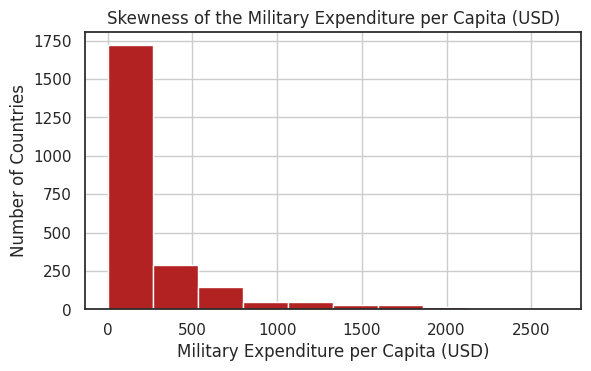

In [53]:
df_total.hist(column='mil_exp_cap', color='firebrick')
print("Skewness of the military expenditure per capita for all the countries: ")
plt.xlabel('Military Expenditure per Capita (USD)')
plt.ylabel('Number of Countries')
plt.title('Skewness of the Military Expenditure per Capita (USD)')

print(skew(df_total['mil_exp_cap'], nan_policy='omit'))

Skewness of the log of the military expenditure per capita for all the countries: 
-0.022291996966932175


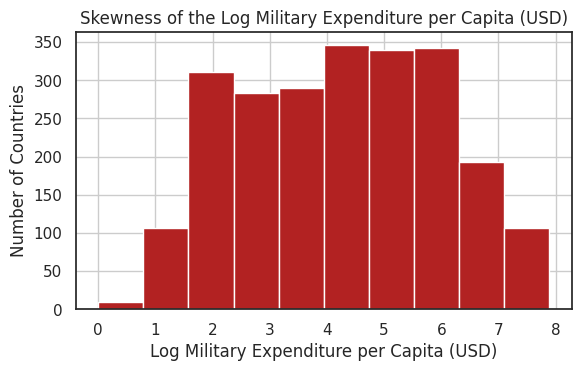

In [54]:
df_total.hist(column='log_mil_exp_cap', color='firebrick')
print("Skewness of the log of the military expenditure per capita for all the countries: ")
plt.xlabel('Log Military Expenditure per Capita (USD)')
plt.ylabel('Number of Countries')
plt.title('Skewness of the Log Military Expenditure per Capita (USD)')

print(skew(df_total['log_mil_exp_cap'], nan_policy='omit'))

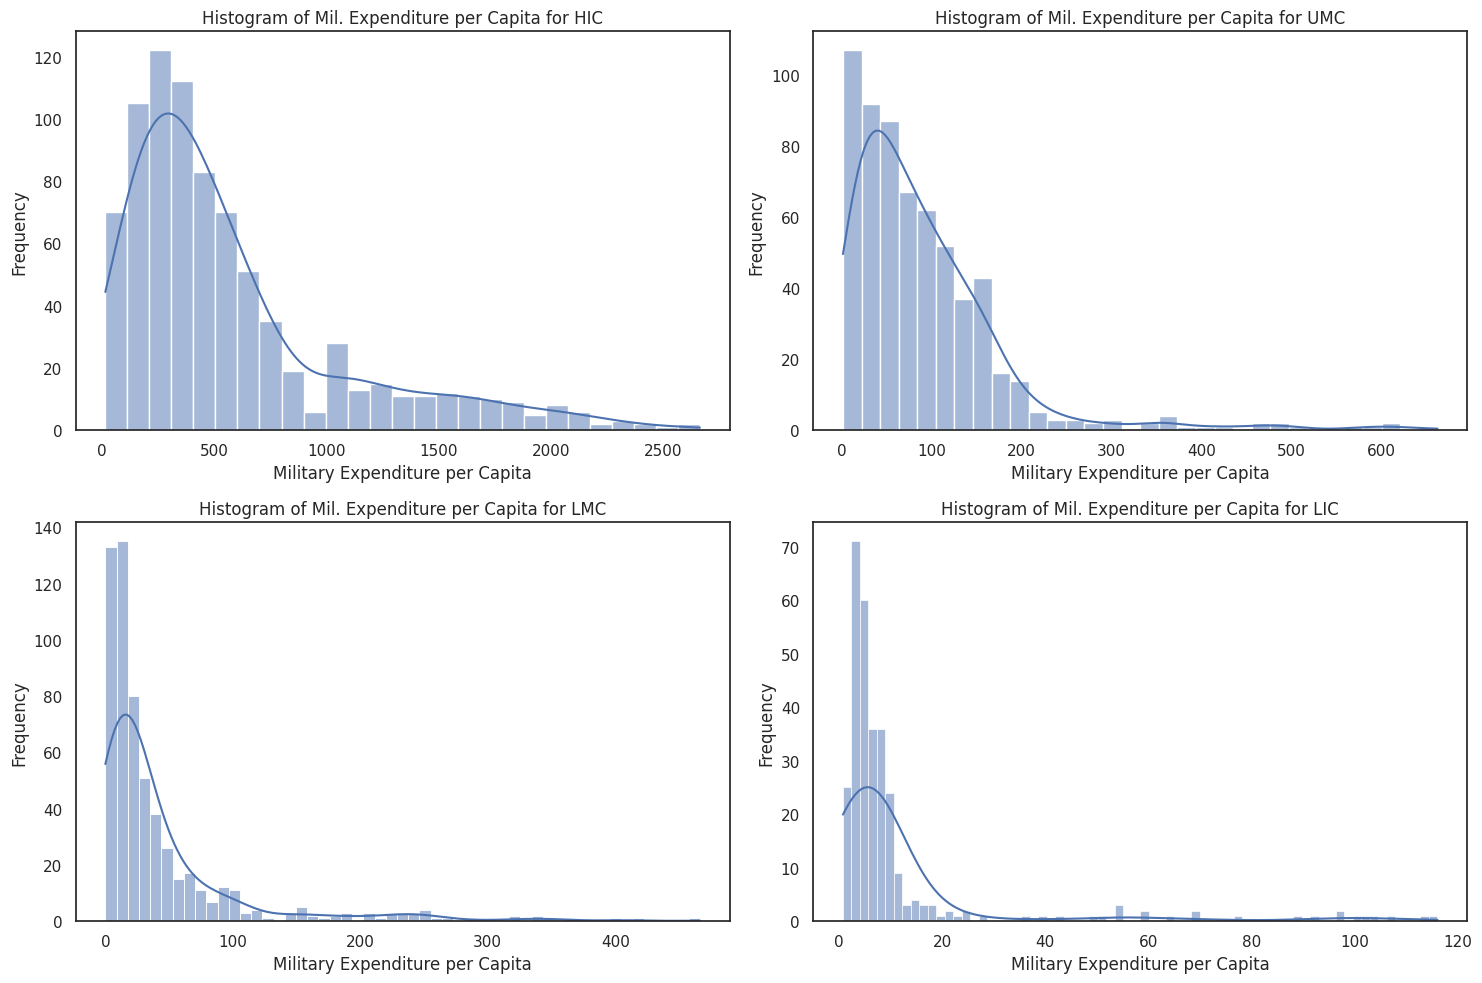

In [55]:
# Plotting histograms for each income group
plt.figure(figsize=(15, 10))

# Creating a histogram for each source category (HIC, UMC, LMC, LIC)
for i, Source in enumerate(['HIC', 'UMC', 'LMC', 'LIC'], 1):
    plt.subplot(2, 2, i)  # This will create 4 subplots (2 rows, 2 columns)
    sns.histplot(df_total[df_total['Source'] == Source]['mil_exp_cap'], kde=True)
    plt.title(f'Histogram of Mil. Expenditure per Capita for {Source}')
    plt.xlabel('Military Expenditure per Capita')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

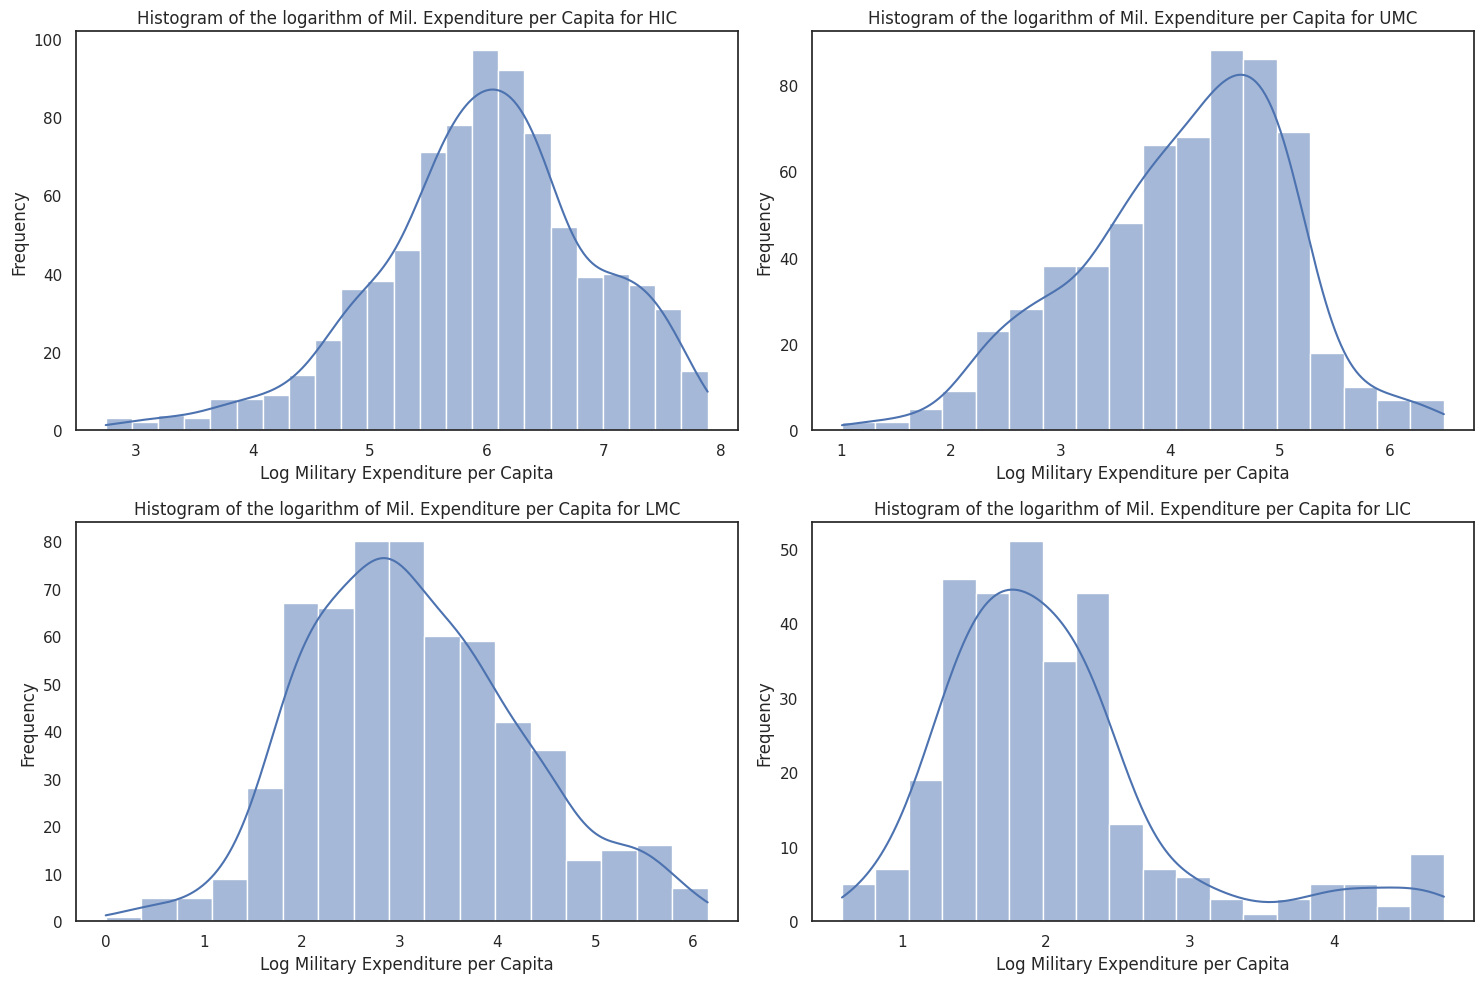

In [56]:
# Plotting histograms for each income group
plt.figure(figsize=(15, 10))

# Creating a histogram for each source category (HIC, UMC, LMC, LIC)
for i, source in enumerate(['HIC', 'UMC', 'LMC', 'LIC'], 1):
    plt.subplot(2, 2, i)  # This will create 4 subplots (2 rows, 2 columns)
    sns.histplot(df_total[df_total['Source'] == source]['log_mil_exp_cap'], kde=True)
    plt.title(f'Histogram of the logarithm of Mil. Expenditure per Capita for {source}')
    plt.xlabel('Log Military Expenditure per Capita')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Percentage of Women in Parliament

In [57]:
descriptive_stats = df_total.groupby('Source')['women_parl'].describe()

print(descriptive_stats)

        count       mean        std       min        25%        50%  \
Source                                                                
HIC     822.0  21.803333  11.138714  0.000000  13.563229  20.598007   
LIC     305.0  19.023474  12.984149  1.204819  10.204082  13.989637   
LMC     589.0  15.557289  10.664981  0.000000   7.228916  12.658228   
UMC     612.0  18.264486   9.572697  2.500000  10.570968  16.428571   

              75%        max  
Source                        
HIC     30.769231  47.277937  
LIC     26.506024  63.750000  
LMC     21.355932  53.076923  
UMC     24.211902  48.200000  


**We can see that we don't have a lot of differentation between the four income groups. HIC countries are in general a little bit higher, but the countries with less income are the only ones crossing the 50% threshold.**

Skewness women_parl: 
0.7058446968697684


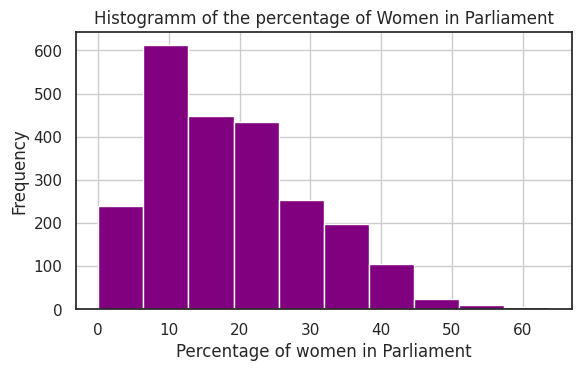

In [58]:
#Histogramm for women in parliament % in  on all countries

df_total.hist(column='women_parl', color='purple')
plt.title('Histogramm of the percentage of Women in Parliament')
plt.xlabel('Percentage of women in Parliament')
plt.ylabel('Frequency')
print("Skewness women_parl: ")
print(skew(df_total['women_parl'], nan_policy='omit'))

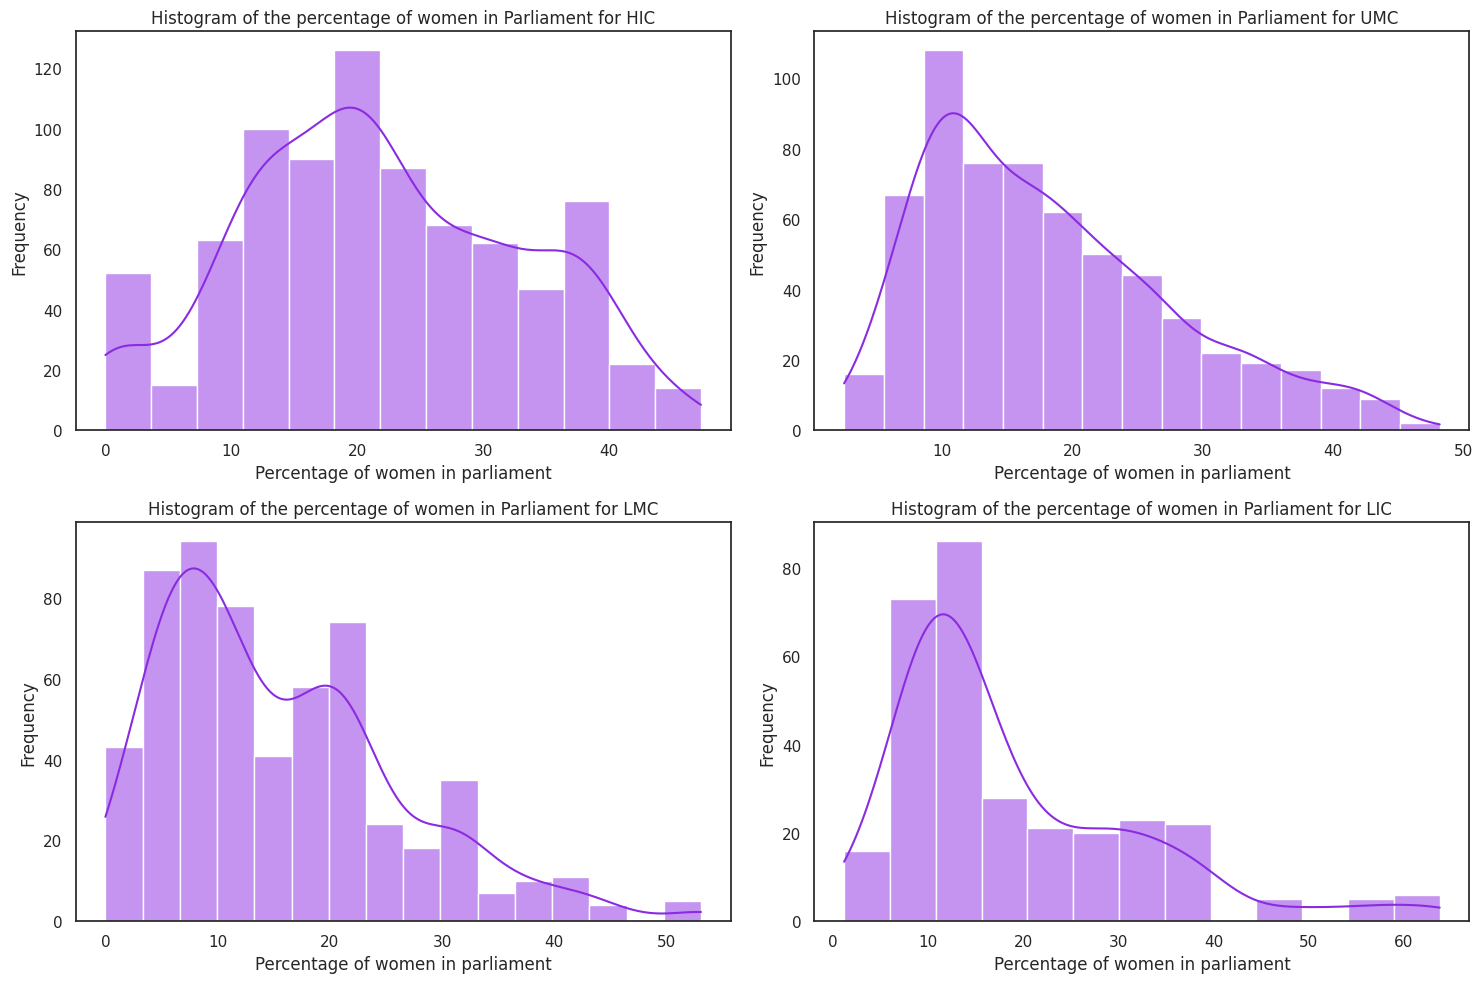

In [59]:
# Plotting histograms for each income group
plt.figure(figsize=(15, 10))

# Creating a histogram for each source category (HIC, UMC, LMC, LIC)
for i, source in enumerate(['HIC', 'UMC', 'LMC', 'LIC'], 1):
    plt.subplot(2, 2, i)  # This will create 4 subplots (2 rows, 2 columns)
    sns.histplot(df_total[df_total['Source'] == source]['women_parl'], kde=True, color='blueviolet')
    plt.title(f'Histogram of the percentage of women in Parliament for {source}')
    plt.xlabel('Percentage of women in parliament')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

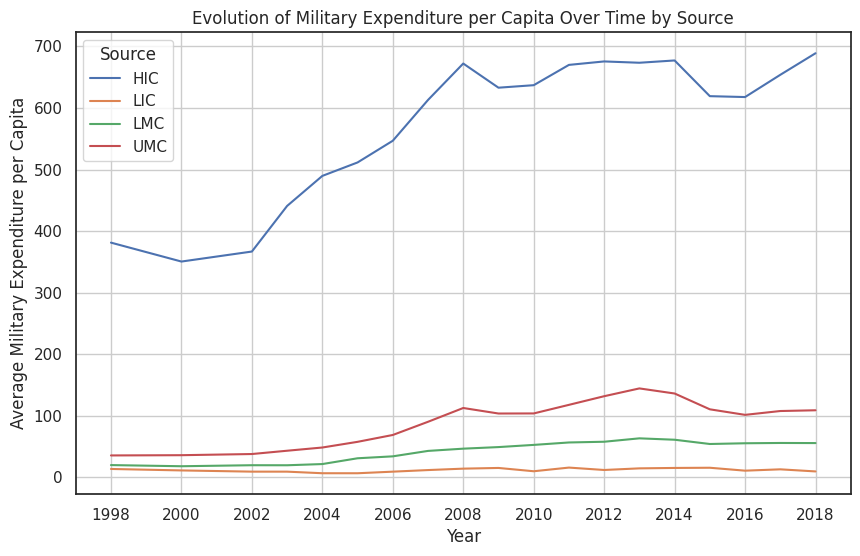

In [60]:
# Pivot the data for easy plotting. We'll focus on 'mil_exp_cap' and 'Source'
df_pivot = df_total.pivot_table(values='mil_exp_cap', index='year', columns='Source', aggfunc='mean')

# Plotting
plt.figure(figsize=(10, 6))
for source in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[source], label=source)

plt.title('Evolution of Military Expenditure per Capita Over Time by Source')
plt.xlabel('Year')
plt.ylabel('Average Military Expenditure per Capita')
plt.xticks(np.arange(1998, 2019, 2))
plt.legend(title='Source')
plt.grid(True)
plt.show()

<ipython-input-61-5a8b3397b533>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



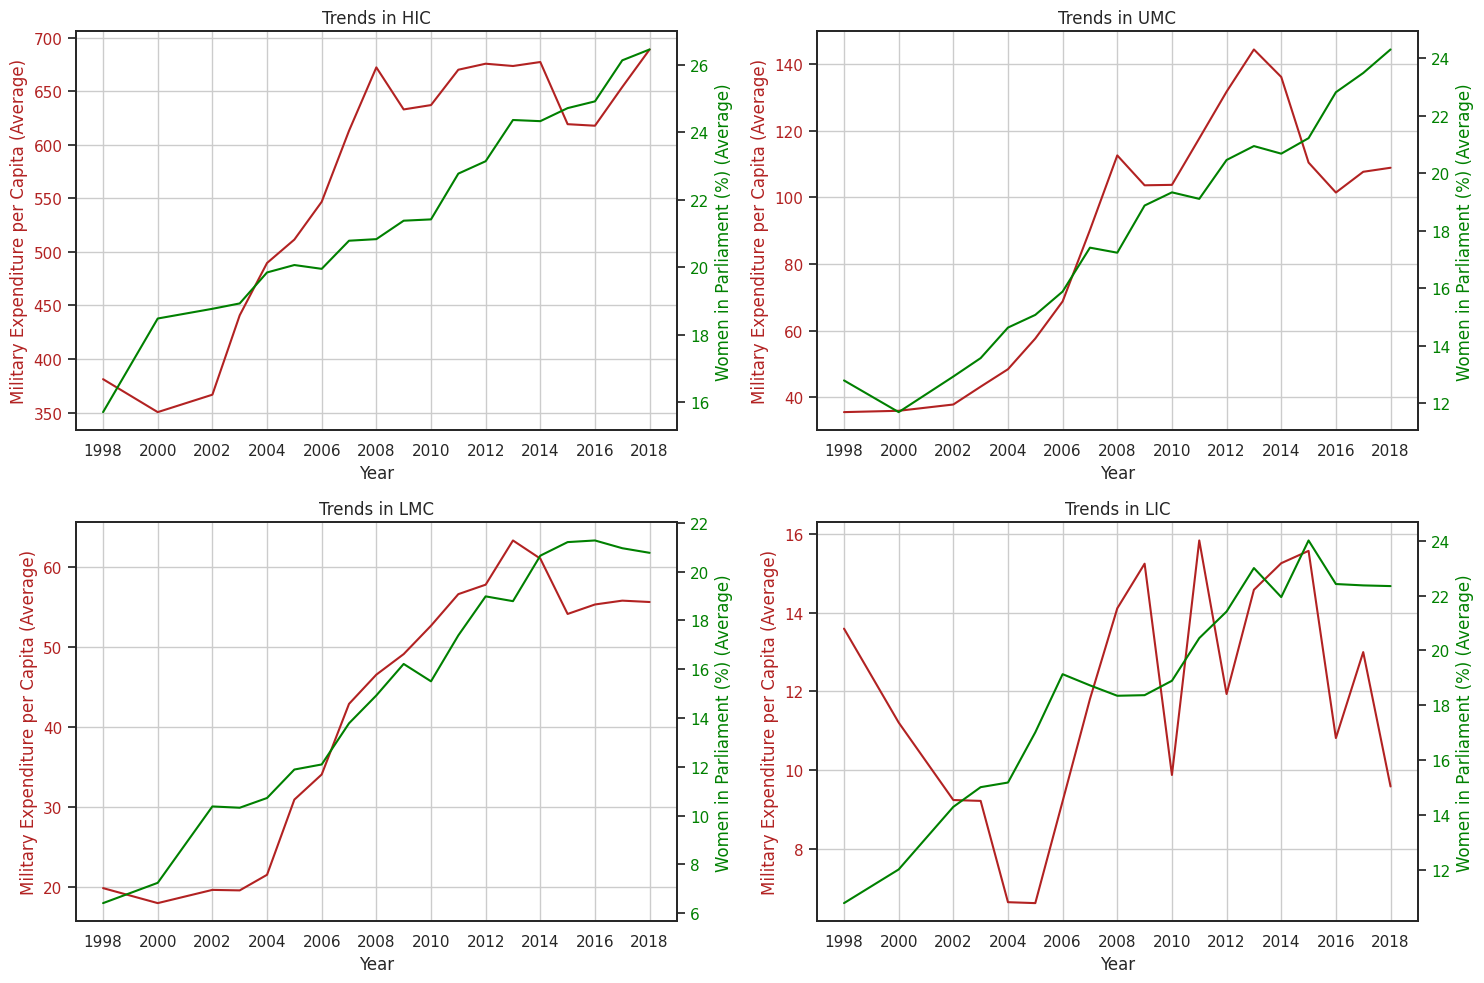

In [61]:
# Calculating the annual averages for military expenditure and women in parliament
annual_averages = df_total.groupby(['year', 'Source']).mean().reset_index()

# Creating a figure with 4 subplots (one for each income level)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
income_levels = ['HIC', 'UMC', 'LMC', 'LIC']

for i, income_level in enumerate(income_levels):
    # Filter the dataframe for each income level
    df_filtered = annual_averages[annual_averages['Source'] == income_level]

    # First Y-axis for military expenditure
    ax1 = axes[i]
    ax1.plot(df_filtered['year'], df_filtered['mil_exp_cap'], color='firebrick', label='Military Expenditure per Capita')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Military Expenditure per Capita (Average)', color='firebrick')
    ax1.set_xticks(np.arange(1998, 2019, 2))
    ax1.tick_params(axis='y', labelcolor='firebrick')

    # Second Y-axis for women in parliament
    ax2 = ax1.twinx()
    ax2.plot(df_filtered['year'], df_filtered['women_parl'], color='green', label='Women in Parliament (Average)')
    ax2.set_ylabel('Women in Parliament (%) (Average)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    ax1.set_title(f'Trends in {income_level}')
    ax1.grid(True)

# Adjust layout and show plot
fig.tight_layout()
plt.show()

This plot shows the evolution of both our variable of interest as average over the income level.

We can see in this grap that there is a general trend of increasing military expenses and percentage of women in parliament, however we have a significant drop between 2014 and 2015 for all income groups.
Another thing that we can derive from this graph is that the change for the LIC countries is very small.



> In 2014, USA remained  the world’s largest military spender accounting for the total of 34% of the world military expenditure, at nearly three times the level of second-placed China, its expenditure dropped by 6.5 per cent in 2014, largely as a result of budget deficit control measures put in place by the US legislature under the 2011 Budget Control Act. US military spending is expected to fall again in 2015 but at a slower rate.

- [TRENDS IN WORLD MILITARY EXPENDITURE, 2014](https://www.files.ethz.ch/isn/193234/SIPRIFS1504.pdf)


In [62]:
# You might want to average 'women_parl' over the years or select a specific year

df_total_average = df_total.groupby('country')['women_parl'].mean().reset_index()

# Creating the choropleth map
fig = px.choropleth(df_total_average,
                    locations='country',
                    locationmode='country names',
                    color='women_parl',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Blues)

fig.show()

We see here, the distribution of percentage women in parliament per country (it is averaged over the whole time)

# Regression

### Simple regression without controls  

In [63]:
ols_simple_results = sm.OLS.from_formula('mil_exp_cap ~ women_parl', df_total).fit()
stargazer_simple = Stargazer([ols_simple_results])
stargazer_simple

### Adding controls to the regression

In [64]:
ols_simple_results_democ = sm.OLS.from_formula('mil_exp_cap ~ women_parl + democracy', df_total).fit()
stargazer = Stargazer([ols_simple_results, ols_simple_results_democ])
stargazer

In [65]:
ols_simple_gdp = sm.OLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita', df_total).fit()
stargazer_all_controls = Stargazer([ols_simple_results,ols_simple_results_democ, ols_simple_gdp])
stargazer_all_controls

**The adjusted R-Squared increases marginally, we can say that this small increase reflects an actual improvement in the fit of the model, and not the fact that we have added another regressor. F-statistic remains high and statistically significant, it implies that your predictors, as a set, are still providing significant explanatory power for the dependent variable.**

### Model with log transformed military expenditure

In [66]:
ols_simple_log = sm.OLS.from_formula('log_mil_exp_cap ~ women_parl + democracy + gdp_capita', df_total).fit()
stargazer_full_log = Stargazer([ols_simple_log])
stargazer_full_log

### Robust regression - accounting for the outliers

In [67]:
# Define the formula for the robust regression model
formula = 'mil_exp_cap ~ women_parl + democracy + gdp_capita'

# Create the robust linear model using Huber's T norm
rlm_model = sm.RLM.from_formula(formula, data=df_total, M=sm.robust.norms.HuberT())

# Fit the model
rlm_results = rlm_model.fit()

# Print the results
print(rlm_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            mil_exp_cap   No. Observations:                 2328
Model:                            RLM   Df Residuals:                     2324
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 21 Dec 2023                                         
Time:                        13:53:57                                         
No. Iterations:                    33                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.5545      2.515     17.316      0.0

## Model with fixed effects

In [68]:
#df_total = df_total.set_index(['country', 'year']) #no need for this because we have it already

In [69]:
from linearmodels.panel import PanelOLS

fixed_effects_model = PanelOLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita + EntityEffects', data=df_total.set_index(["country", "year"]))
fixed_effects_results = fixed_effects_model.fit()

# To display the fixed effects results
print(fixed_effects_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            mil_exp_cap   R-squared:                        0.3686
Estimator:                   PanelOLS   R-squared (Between):              0.5544
No. Observations:                2328   R-squared (Within):               0.3686
Date:                Thu, Dec 21 2023   R-squared (Overall):              0.5442
Time:                        13:53:57   Log-likelihood                -1.357e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      425.11
Entities:                         140   P-value                           0.0000
Avg Obs:                       16.629   Distribution:                  F(3,2185)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             425.11
                            

### Log model

In [70]:
fixed_effects_model_log = PanelOLS.from_formula('log_mil_exp_cap  ~ women_parl + democracy + gdp_capita + EntityEffects', data=df_total.set_index(["country", "year"]))
fixed_effects_results_log = fixed_effects_model_log.fit()

# To display the fixed effects results and log for military per capita
print(fixed_effects_results_log)

                          PanelOLS Estimation Summary                           
Dep. Variable:        log_mil_exp_cap   R-squared:                        0.2764
Estimator:                   PanelOLS   R-squared (Between):              0.3479
No. Observations:                2328   R-squared (Within):               0.2764
Date:                Thu, Dec 21 2023   R-squared (Overall):              0.3584
Time:                        13:53:58   Log-likelihood                   -901.10
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      278.16
Entities:                         140   P-value                           0.0000
Avg Obs:                       16.629   Distribution:                  F(3,2185)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             278.16
                            

### Model with robus standard errrors - adressing  heteroskedasticity and autocorrelation

In [71]:
# Fit the model with robust standard errors
fixed_effects_results_robust = fixed_effects_model.fit(cov_type='robust')

print("Coefficient Estimates (Robust Standard Errors):")
for param in fixed_effects_results_robust.params.index:
    print(f"{param}: {fixed_effects_results_robust.params[param]:.4f} "
          f"({fixed_effects_results_robust.std_errors[param]:.4f})")


Coefficient Estimates (Robust Standard Errors):
women_parl: 1.7222 (0.3400)
democracy: -0.1206 (0.7367)
gdp_capita: 0.0107 (0.0007)


In [72]:
print(fixed_effects_results_robust.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:            mil_exp_cap   R-squared:                        0.3686
Estimator:                   PanelOLS   R-squared (Between):              0.5544
No. Observations:                2328   R-squared (Within):               0.3686
Date:                Thu, Dec 21 2023   R-squared (Overall):              0.5442
Time:                        13:53:58   Log-likelihood                -1.357e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                      425.11
Entities:                         140   P-value                           0.0000
Avg Obs:                       16.629   Distribution:                  F(3,2185)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             98.567
                            

### Reverse causality

In [73]:
reverse_causality = sm.OLS.from_formula('women_parl ~ mil_exp_cap', df_total).fit()
reverse_causality_tabl = reverse_causality.summary().tables[1]
reverse_causality_tabl

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.4892,0.270,68.515,0.000,17.960,19.018
mil_exp_cap,0.0018,0.001,3.143,0.002,0.001,0.003


### Inference method - Using IV

<br><br>
$$
\kappa = \frac{\text{Cov}(Y_i, Z_i) / V(Z_i)}{\text{Cov}(T_i, Z_i) / V(Z_i)} = \frac{\text{Cov}(Y: \text{Military Expenditure}, Z: \text{Laws and Regulations}) / V(Z: \text{Laws and Regulations})}{\text{Cov}(T: \text{Women in Parliament}, Z: \text{Laws and Regulations}) / V(Z: \text{Laws and Regulations})} = \frac{\text{Reduced Form}}{\text{1st Stage}}
$$
<br><br>

**κ (kappa)**: Represents the estimated causal effect of the proportion of women in parliament (the treatment, $( T )$ on the military expenditure of the country (the outcome, $( Y )$.

**Reduced Form**: This is the covariance of the outcome variable $( Y_i )$ with the instrument $( Z_i )$, divided by the variance of the instrument $( V(Z_i) )$. It captures the overall association between the instrument and the outcome.

**1st Stage**: This is the covariance of the treatment variable $( T_i )$ with the instrument $( Z_i )$, divided by the variance of the instrument $( V(Z_i) )$. It captures the strength of the relationship between the instrument and the treatment.

In [74]:
first_stage = smf.ols("women_parl ~ democracy + gdp_capita + law_business", data=df_total).fit()

print("law_business parameter estimate: ", first_stage.params["law_business"])
print("law_business p-value: ", first_stage.pvalues["law_business"])

law_business parameter estimate:  0.31712272248875606
law_business p-value:  3.6760024100124345e-90


In [75]:
reduced_form = smf.ols("mil_exp_cap  ~ democracy + gdp_capita + law_business", data=df_total).fit()

print("law_business parameter estimate:, ", reduced_form.params["law_business"])
print("law_business p-value:, ", reduced_form.pvalues["law_business"])

law_business parameter estimate:,  -3.3299826074348333
law_business p-value:,  2.381956225219048e-14


In [76]:
reduced_form.params["law_business"] / first_stage.params["law_business"]

-10.50061181772587

In [77]:
def parse(model, exog= "women_parl"):
    param = model.params[exog]
    se = model.std_errors[exog]
    p_val = model.pvalues[exog]
    f_stat = model.f_statistic.stat
    f_p_val = model.f_statistic.pval

    print(f"Parameter: {param}")
    print(f"SE: {se}")
    print(f"95 CI: {(-1.96*se,1.96*se) + param}")
    print(f"P-value: {p_val}")
    print(f"F-statistic: {f_stat}")
    print(f"F-test p-value: {f_p_val}")


formula = 'mil_exp_cap ~ 1 + gdp_capita + democracy + [women_parl ~ law_business]'
iv2sls = IV2SLS.from_formula(formula, df_total).fit()
parse(iv2sls)

Parameter: -10.500611817725883
SE: 1.3162496268449413
95 CI: [-13.08046109  -7.92076255]
P-value: 1.5543122344752192e-15
F-statistic: 433.63378687220995
F-test p-value: 0.0


In [78]:
df_total

,country,year,democracy,mil_expenditure,mil_expenditure_usd,population,women_parl,gdp_capita,gdp_usd,stability,law_business,mil_exp_cap,log_mil_exp_cap,Source
0,Australia,1998,10.0,1.871122,7.107543e+09,18607584.0,15.540541,21478.385157,3.996609e+11,1.066501,81.25,381.970217,5.947957,HIC
1,Australia,2000,10.0,1.829842,7.273760e+09,19028802.0,22.972973,21853.449993,4.158450e+11,1.333965,81.25,382.250039,5.948688,HIC
2,Australia,2002,10.0,1.873965,7.946766e+09,19495210.0,25.333333,20290.780419,3.955730e+11,1.189415,81.25,407.626602,6.012802,HIC
3,Australia,2003,10.0,1.846290,9.926649e+09,19720737.0,25.333333,23705.907216,4.674980e+11,0.878117,81.25,503.360976,6.223292,HIC
4,Australia,2004,10.0,1.827411,1.199522e+10,19932722.0,24.666667,30819.993487,6.143264e+11,0.935464,81.25,601.785331,6.401561,HIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,Uganda,2014,-1.0,0.885150,3.256630e+08,36336539.0,34.974093,897.509729,3.261240e+10,-0.941126,70.00,8.962412,2.298819,LIC
2324,Uganda,2015,-1.0,1.043148,3.061447e+08,37477356.0,34.974093,864.180059,3.238718e+10,-0.804576,70.00,8.168791,2.215805,LIC
2325,Uganda,2016,-1.0,1.043258,3.185517e+08,38748299.0,33.489461,753.684406,2.920399e+10,-0.718276,70.00,8.221049,2.221489,LIC
2326,Uganda,2017,-1.0,1.105465,3.467629e+08,40127085.0,34.298441,766.177604,3.074447e+10,-0.569949,70.00,8.641617,2.266089,LIC


In [79]:
formula2 = 'mil_exp_cap ~ 1 + C(country) + C(year) + gdp_capita + democracy  + [women_parl ~ law_business]'

# Create and fit the model
iv2slsfe = IV2SLS.from_formula(formula2, df_total).fit()

# Now use your parse function to display the results
parse(iv2slsfe)

Parameter: -21.664267728550293
SE: 11.945357656049069
95 CI: [-45.07716873   1.74863328]
P-value: 0.06973717548903124
F-statistic: 33983.26872681217
F-test p-value: 0.0


### Interation term

We are looking at the impact of stability on the relation between percentage of women in Parliament and military expenditure per capita.

In [80]:

# Create the interaction term
df_total['interaction'] = df_total['stability'] * df_total['women_parl']

# Define the model
X = df_total[['women_parl', 'stability', 'interaction', 'gdp_capita', 'democracy']]  # Independent variables
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_total['mil_exp_cap']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# View the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            mil_exp_cap   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     511.4
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:54:00   Log-Likelihood:                -16377.
No. Observations:                2328   AIC:                         3.277e+04
Df Residuals:                    2322   BIC:                         3.280e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         196.4537     12.852     15.285      

# Analysis for different group of countries

### HIC

In [81]:
df_hic = df_total[df_total['Source'] == 'HIC']

ols_simple_results_hic = sm.OLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita', df_hic).fit()
stargazer_simple_hic = Stargazer([ols_simple_results_hic])
stargazer_simple_hic

In [82]:
fixed_effects_model_HIC = PanelOLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita + EntityEffects', data=df_hic.set_index(["country", "year"]))
fixed_effects_results_HIC = fixed_effects_model_HIC.fit()

# To display the fixed effects results
print(fixed_effects_results_HIC)

                          PanelOLS Estimation Summary                           
Dep. Variable:            mil_exp_cap   R-squared:                        0.3829
Estimator:                   PanelOLS   R-squared (Between):              0.5713
No. Observations:                 822   R-squared (Within):               0.3829
Date:                Thu, Dec 21 2023   R-squared (Overall):              0.5613
Time:                        13:54:01   Log-likelihood                   -5166.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      159.88
Entities:                          46   P-value                           0.0000
Avg Obs:                       17.870   Distribution:                   F(3,773)
Min Obs:                       1.0000                                           
Max Obs:                       19.000   F-statistic (robust):             159.88
                            

### UMC

In [83]:
df_umc = df_total[df_total['Source'] == 'UMC']

ols_simple_results_umc = sm.OLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita', df_umc).fit()
stargazer_simple_umc = Stargazer([ols_simple_results_umc])
stargazer_simple_umc

In [84]:
fixed_effects_model_UMC = PanelOLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita + EntityEffects', data=df_umc.set_index(["country", "year"]))
fixed_effects_results_UMC = fixed_effects_model_UMC.fit()

# To display the fixed effects results
print(fixed_effects_results_UMC)

                          PanelOLS Estimation Summary                           
Dep. Variable:            mil_exp_cap   R-squared:                        0.4512
Estimator:                   PanelOLS   R-squared (Between):              0.7063
No. Observations:                 612   R-squared (Within):               0.4512
Date:                Thu, Dec 21 2023   R-squared (Overall):              0.6213
Time:                        13:54:01   Log-likelihood                   -3157.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      157.04
Entities:                          36   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                   F(3,573)
Min Obs:                       7.0000                                           
Max Obs:                       19.000   F-statistic (robust):             157.04
                            

### LMC

In [85]:
df_lmc = df_total[df_total['Source'] == 'LMC']

ols_simple_results_LMC = sm.OLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita', df_lmc).fit()
stargazer_simple_LMC = Stargazer([ols_simple_results_LMC])
stargazer_simple_LMC

In [86]:
fixed_effects_model_LMC = PanelOLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita + EntityEffects', data=df_lmc.set_index(["country", "year"]))
fixed_effects_results_LMC = fixed_effects_model_LMC.fit()

# To display the fixed effects results
print(fixed_effects_results_LMC)

                          PanelOLS Estimation Summary                           
Dep. Variable:            mil_exp_cap   R-squared:                        0.5351
Estimator:                   PanelOLS   R-squared (Between):              0.7574
No. Observations:                 589   R-squared (Within):               0.5351
Date:                Thu, Dec 21 2023   R-squared (Overall):              0.7324
Time:                        13:54:01   Log-likelihood                   -2522.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      210.66
Entities:                          37   P-value                           0.0000
Avg Obs:                       15.919   Distribution:                   F(3,549)
Min Obs:                       4.0000                                           
Max Obs:                       19.000   F-statistic (robust):             210.66
                            

### LIC

In [87]:
df_lic = df_total[df_total['Source'] == 'LIC']

ols_simple_results_lic = sm.OLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita', df_lic).fit()
stargazer_simple_lic = Stargazer([ols_simple_results_lic])
stargazer_simple_lic

In [88]:
fixed_effects_model_LIC = PanelOLS.from_formula('mil_exp_cap ~ women_parl + democracy + gdp_capita + EntityEffects', data=df_lic.set_index(["country", "year"]))
fixed_effects_results_LIC = fixed_effects_model_LIC.fit()

# To display the fixed effects results
print(fixed_effects_results_LIC)

                          PanelOLS Estimation Summary                           
Dep. Variable:            mil_exp_cap   R-squared:                        0.4267
Estimator:                   PanelOLS   R-squared (Between):              0.3681
No. Observations:                 305   R-squared (Within):               0.4267
Date:                Thu, Dec 21 2023   R-squared (Overall):              0.4662
Time:                        13:54:02   Log-likelihood                   -1019.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      69.729
Entities:                          21   P-value                           0.0000
Avg Obs:                       14.524   Distribution:                   F(3,281)
Min Obs:                       4.0000                                           
Max Obs:                       19.000   F-statistic (robust):             69.729
                            